# Plotting groups from DataFrames with matplotlib
*Jordan Lubbers* <br>
*U.S. Geological Survey Alaska Volcano Observatory*

So you have a spreadsheet with all your awesome data in it and want to visualize the data? Great! But what if you want to take it a step further and plot things categorically based on unique identifiers in a column? A little ```pandas``` and ```matplotlib``` knowledge will get you there! Here we'll use some whole rock major element data from tephra in Alaska. All data is taken from the public GEODIVA geochemistry [database](https://www.avo.alaska.edu/geochem/) run by the Alaska Volcano Observatory.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys

sys.path.append(r"C:\Users\jlubbers\OneDrive - DOI\Research\Coding\Python_scripts")
# custom plotting defaults
# see https://github.com/rougier/scientific-visualization-book/blob/master/code/defaults/defaults-step-3.py
# and https://github.com/rougier/scientific-visualization-book for more
import mpl_defaults

In [2]:
data = pd.read_excel(
    r"C:\Users\jlubbers\OneDrive - DOI\Research\Mendenhall\Data\AVO_GEOCHEM_Public_October2021.xlsx",
    sheet_name="HighQ",
)
data.head()

,UniqueID,SampleID,StationID,Latitude,LongitudeReal,Longitude,Collector,DateVisited,Volcano,PossibleSourceVolcano,...,Sc,V,Cr,Co,Ni,Cu,Zn,Ga,Reftrace,METHtrace
0,41681,KON-07-04,KON-07-04,52.2249,-175.14008,184.85992,JichaBrianR,2007-07-00,Koniuji,NaN,...,18.5,197.0,9.3,15.7,7.3,63.8,70.0,NaN,4545,ICPMS
1,41661,KON-07-02,KON-07-02,52.2162,-175.13668,184.86332,JichaBrianR,2007-07-00,Koniuji,NaN,...,29.9,270.0,32.9,24.2,13.8,53.4,77.0,NaN,4545,ICPMS
2,41671,KON-07-03,KON-07-03,52.2189,-175.13638,184.86362,JichaBrianR,2007-07-00,Koniuji,NaN,...,21.4,211.0,15.4,19.0,9.6,46.2,70.0,NaN,4545,ICPMS
3,41651,KON-07-01,KON-07-01,52.2147,-175.13398,184.86602,JichaBrianR,2007-07-00,Koniuji,NaN,...,32.7,271.0,38,24.5,14.2,61.9,73.0,NaN,4545,ICPMS
4,41691,KON-07-05,KON-07-05,52.2211,-175.13218,184.86782,JichaBrianR,2007-07-00,Koniuji,NaN,...,13.9,157.0,10.9,13.6,6.6,32,71.0,NaN,4545,ICPMS


In this dataset we see many columns for geochemical components (things to plot) as well as descriptors belonging to its sample, eruption, volcano, etc (things to group by).

In [3]:
print(data.columns.tolist())

['UniqueID', 'SampleID', 'StationID', 'Latitude', 'LongitudeReal', 'Longitude', 'Collector', 'DateVisited', 'Volcano', 'PossibleSourceVolcano', 'Eruption', 'LocationDescription', 'SampType', 'SampleDescription', 'Comments', 'AT-NUM', 'TephraName', 'n', 'SiO2', 'TiO2', 'Al2O3', 'FeOT', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'Total-majors', 'REFmajors', 'METHmajors', 'Cs', 'Rb', 'Ba', 'Sr', 'La', 'Ce', 'Pr', 'Nd', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Y', 'Zr', 'Nb', 'Hf', 'Ta', 'Pb', 'Th', 'U', 'Sc', 'V', 'Cr', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Reftrace', 'METHtrace']


## A Basic plot

Text(0, 0.5, 'K2O wt%')

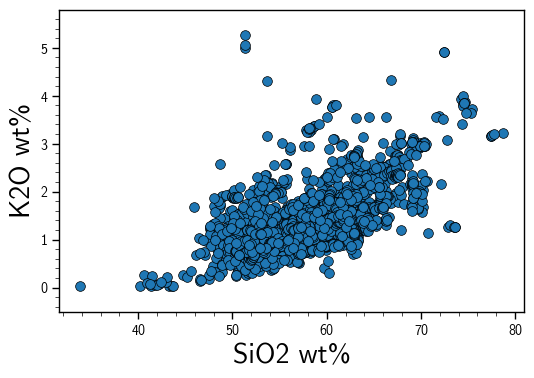

In [4]:
elx = "SiO2"
ely = "K2O"

fig, ax = plt.subplots()
ax.plot(data[elx], data[ely], marker="o", ls="", mec="k")
ax.set_xlabel(f"{elx} wt%")
ax.set_ylabel(f"{ely} wt%")

## Group your dataframe by columns
There are a couple ways to do this, but I find the easiest way is to iteratively plot each group and specify a color/marker. The logic is as follows:
1. set the index of your dataframe to the column with the categorical variables 
2. get a list of the unique values in that column
    - determine a list of plotting ```**kwargs``` for each unique value
3. plot each unique group in a loop!


Below we'll use the "Volcano" column as our categorical:


In [5]:
# set the index of the dataframe to the categorical column
volcano_data = data.set_index("Volcano")

# get a list of the unique values for the categorical
# note this .unique() method works on any column
volcanoes = volcano_data.index.unique().tolist()

print(volcanoes)

['Koniuji', 'Seguam', 'PyrePeak', 'Wilcox', 'Moundhill', 'Recheshnoi', 'Okmok', 'Bogoslof', 'Makushin', 'TableTopMtn', 'Akutan', 'Westdahl', 'Fisher', 'Shishaldin', 'Morzhovoi', 'Frosty', 'Dutton', 'Pavlof', 'Aniakchak', 'UkinrekMaars', 'Cerberus,Mt', 'FallingMtn', 'Novarupta', 'Trident', 'Augustine', 'Redoubt', 'Spurr', 'Kiska', 'Chiginagak', 'EmmonsLakeVolcanicCenter', 'PavlofSister', 'GreatSitkin', 'Kasatochi', 'Veniaminof', 'Hayes', 'Semisopochnoi', 'Gareloi', 'Tanaga', 'Takawangha', 'Kanaga', 'BlackPeak', 'LittleSitkin', 'IngenstremDepressionVolcanicField', 'Bobrof', 'Moffett', 'Yunaska', 'Carlisle', 'Herbert', 'Uliaga', 'Tana', 'ConeD', 'Amak', 'WesternCones', 'BackWest', '70B29', 'DownSouth', 'Madonna', 'SnakeRiverPlains', 'UpSouth', 'Willy', 'Muffin', 'DwightEast', 'Parasite1', 'Crinkly', 'Parasite2', 'Buldir']


Now we can access the data for each individual column using ```.loc[rows,columns]``` for example...all the data for Akutan volcano:

In [6]:
volcano_data.loc["Akutan", :]

,UniqueID,SampleID,StationID,Latitude,LongitudeReal,Longitude,Collector,DateVisited,PossibleSourceVolcano,Eruption,...,Sc,V,Cr,Co,Ni,Cu,Zn,Ga,Reftrace,METHtrace
Volcano,,,,,,,,,,,,,,,,,,,,,
Akutan,57742,96PS-XEN,96PSXEN,54.13308,-165.98555,194.01445,StellingPeterL,1996-01-01 00:00:00,NaN,NaN,...,8.333000,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,13291,ICPMS
Akutan,32978,AK-81-14,AK-81-14,54.13308,-165.98555,194.01445,UnknownUnknown,1981-01-01 00:00:00,NaN,NaN,...,34.200000,315.0000,116,54.0,34.0000,NaN,NaN,NaN,2013,ICPMS
Akutan,32976,AK-81-5,AK-81-5,54.13308,-165.98555,194.01445,UnknownUnknown,1981-01-01 00:00:00,NaN,NaN,...,30.300000,288.0000,4,55.0,5.0000,NaN,NaN,NaN,2013,ICPMS
Akutan,57752,96PS09,96PS09,54.13308,-165.98555,194.01445,StellingPeterL,1996-00-00,NaN,NaN,...,28.000000,290.0000,11,NaN,2.0000,116,80.0000,17.4000,3676,ICPMS
Akutan,57812,96PS18,96PS18,54.13308,-165.98555,194.01445,StellingPeterL,1996-00-00,NaN,Akutan1929/6,...,29.000000,262.0000,29,NaN,3.0000,104,87.0000,19.0000,3676,ICPMS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Akutan,44202,96-ARh-38D,96-ARh-38D,54.19900,-165.95600,194.04400,RichterDonaldH,1996-00-00,NaN,NaN,...,10.384476,22.0000,0,NaN,6.0000,2,86.0000,20.0000,924,"ICPMS:Cs,Rb,Ba,Sr,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,H..."
Akutan,119591,14AKMC049,14AKMC049,54.11841,-165.91625,194.08375,CoombsMichelleL,2014-07-25 00:00:00,NaN,NaN,...,18.610231,159.2745,0,NaN,1.4775,56.4405,89.3395,18.6165,14991,"ICPMS:Cs,Rb,Ba,Sr,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,H..."
Akutan,44292,96-Mc-28,96-Mc-28,54.08950,-165.69468,194.30532,McGimseyRobertGame,1996-00-00,NaN,NaN,...,6.184482,3.0000,0,NaN,8.0000,24,62.0000,17.0000,924,"ICPMS:Cs,Rb,Ba,Sr,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,H..."


## Tweaking markers
Matplotlib has a lot of different [markers](https://matplotlib.org/stable/api/markers_api.html) and [fill styles](https://matplotlib.org/stable/gallery/lines_bars_and_markers/marker_reference.html). They also have a lot of [built in colors](https://matplotlib.org/stable/gallery/color/named_colors.html) that can be referenced by name or you can use any hex code. 

In [7]:
from matplotlib.lines import Line2D

mpl_markers = list(Line2D.markers.keys())
print(mpl_markers)

['.', ',', 'o', 'v', '^', '<', '>', '1', '2', '3', '4', '8', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_', 'P', 'X', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 'None', None, ' ', '']


To generate a unique marker for each categorical value we could simply iterate through each list using ```zip``` (the lists don't have to be the same length...```zip``` automatically stops with the shortest list).

This is a lot to look at but illustrates well the point that by specifying marker and no color, we can get many unique marker-color combinations relatively easily. (Also Alaska has a lot of volcanoes)

Text(0, 0.5, 'K2O wt%')

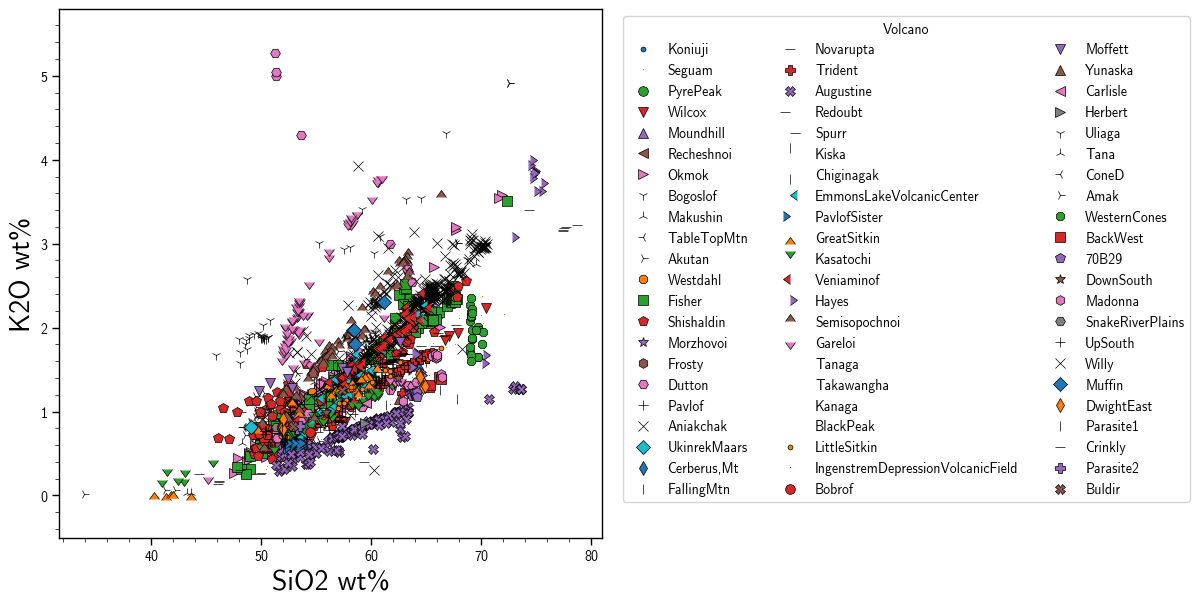

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))

# simulataneously iterate through both lists and plot the categories
# letting matplotlib choose the colors based on defaults
for volcano, mpl_marker in zip(volcanoes, mpl_markers * 2):
    ax.plot(
        volcano_data.loc[volcano, elx],
        volcano_data.loc[volcano, ely],
        ls="",
        marker=mpl_marker,
        label=volcano,
        mew=0.5,
    )

fig.legend(bbox_to_anchor=(1.75, 0.88), title="Volcano", ncol=3)
ax.set_xlabel(f"{elx} wt%")
ax.set_ylabel(f"{ely} wt%")

Another way to have more complete control over the look of each category is each one its own dictionary of ```**kwargs```. Here we create a ["nested dictionary"](https://www.programiz.com/python-programming/nested-dictionary). The outermost dictionary has keys that correspond to each categorical variable (Volcano) and values that correspond to dictionaries of plotting kwargs in matplotlib that are unique to each categorical variable. Creating a dictionary like this may be useful for something like a manuscript or talk where you want the look of the category to stay the same for many plots/figures where you can just define this once and use copy and paste as your friend in all your scripts...this will also save you a lot of time when you inevitably have to redo a figure because of more data or something similar.

Below is an example of this for four volcanoes:

In [9]:
# create the nested dictionary
# kwarg_dict.keys() returns a list of volcano names
# kwarg_dict.values() returns a list dictionaries to be used as plotting kwargs
# for each category
kwarg_dict = {
    "Augustine": {
        "marker": "s",
        "mfc": "C1",
        "mec": "darkorange",
        "markerfacecoloralt": "bisque",
        "fillstyle": "bottom",
    },
    "Redoubt": {
        "marker": "^",
        "mfc": "firebrick",
        "mec": "maroon",
        "markerfacecoloralt": "mistyrose",
        "fillstyle": "left",
    },
    "Novarupta": {
        "marker": "o",
        "mfc": "cornflowerblue",
        "mec": "navy",
        "markerfacecoloralt": "lightsteelblue",
        "fillstyle": "top",
    },
    "Hayes": {
        "marker": "d",
        "mfc": "forestgreen",
        "mec": "darkgreen",
        "markerfacecoloralt": "lightgreen",
        "fillstyle": "right",
    },
}

# example of the nested dictionary iteration that
# we'll use for the plotting loop
for k in kwarg_dict:
    print(f"key: {k}\nvalue: {kwarg_dict[k]}\n")

key: Augustine
value: {'marker': 's', 'mfc': 'C1', 'mec': 'darkorange', 'markerfacecoloralt': 'bisque', 'fillstyle': 'bottom'}

key: Redoubt
value: {'marker': '^', 'mfc': 'firebrick', 'mec': 'maroon', 'markerfacecoloralt': 'mistyrose', 'fillstyle': 'left'}

key: Novarupta
value: {'marker': 'o', 'mfc': 'cornflowerblue', 'mec': 'navy', 'markerfacecoloralt': 'lightsteelblue', 'fillstyle': 'top'}

key: Hayes
value: {'marker': 'd', 'mfc': 'forestgreen', 'mec': 'darkgreen', 'markerfacecoloralt': 'lightgreen', 'fillstyle': 'right'}



Text(0, 0.5, 'K$_2$O wt%')

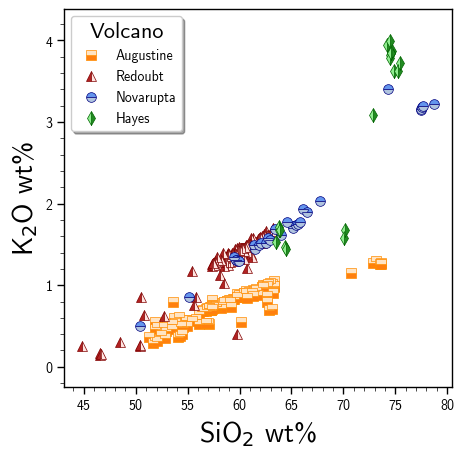

In [10]:
# The plot!
fig, ax = plt.subplots(figsize=(5, 5))

# iterate through the nested dictionary
for k in kwarg_dict:
    ax.plot(
        volcano_data.loc[k, elx],
        volcano_data.loc[k, ely],
        ls="",
        ms=7,
        **kwarg_dict[k],
        label=k,
    )

ax.legend(loc="upper left", shadow=True, title="Volcano", title_fontsize=16)
# latex string formatting for those pesky subscripts
ax.set_xlabel("{} wt%".format("".join([f"$_{l}$" if l.isdigit() else l for l in elx])))
ax.set_ylabel("{} wt%".format("".join([f"$_{l}$" if l.isdigit() else l for l in ely])))

***Note*** that this will also work for other plotting functions within matplotlib such as (but certainly not limited to):
- [scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)
- [errorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html)

the only thing that is different are the names of the parameters that go into the dictionary of ```**kwargs```! So go make some cool plots! 

Remember: *"Matplotlib makes easy things easy and hard things possible"*. If you can think of it...it can probably be a figure.